In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins.csv')
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

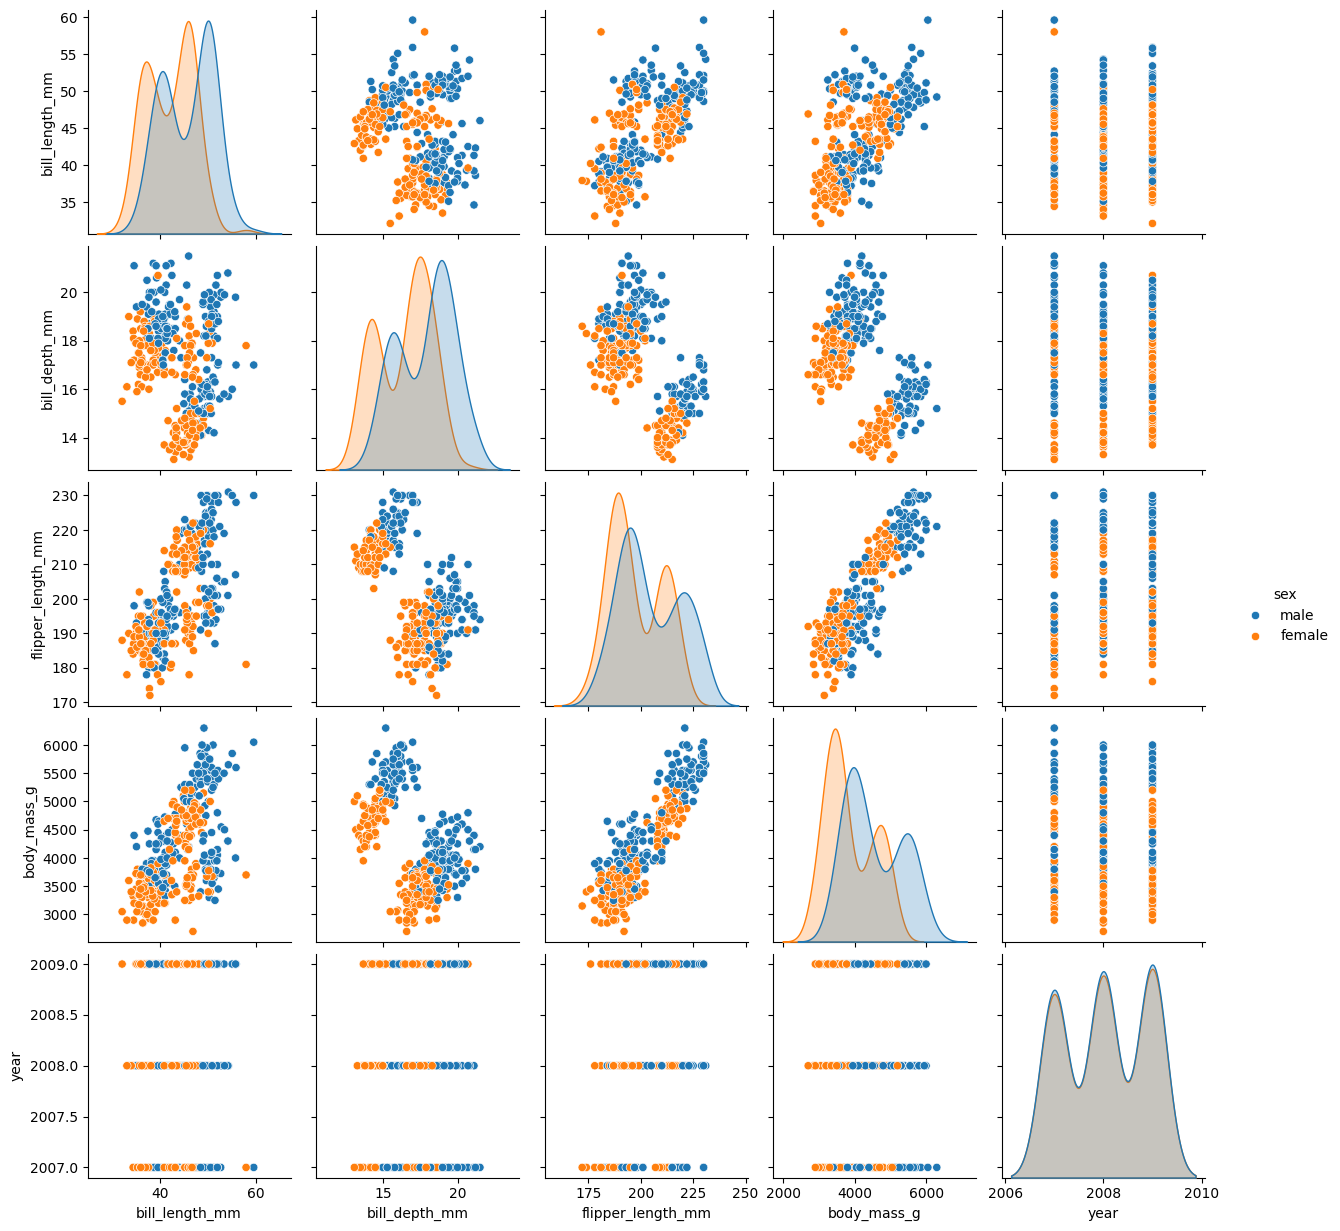

In [5]:
sns.pairplot(df, hue='sex')

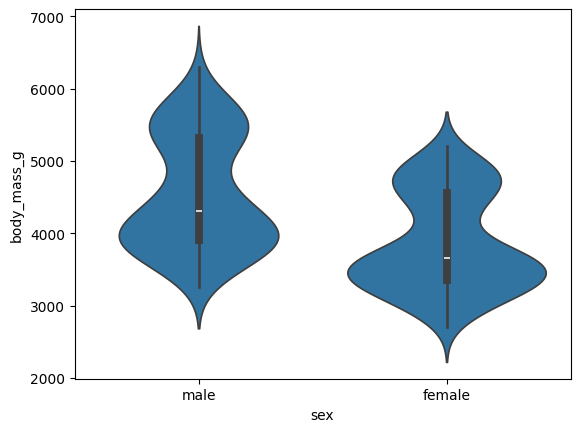

In [6]:
sns.violinplot(x=df['sex'], y=df['body_mass_g'])
plt.show()

<Axes: xlabel='island', ylabel='body_mass_g'>

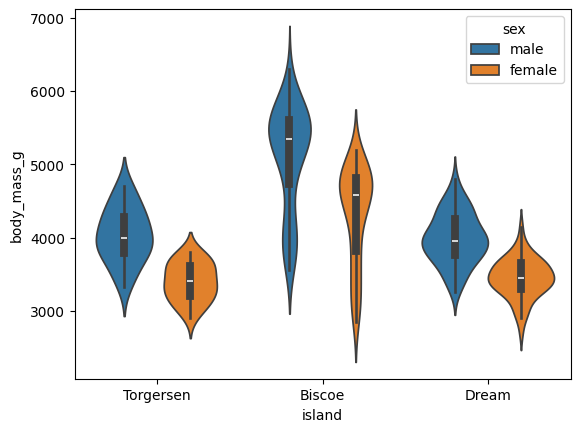

In [7]:
sns.violinplot(x=df['island'], y=df['body_mass_g'], hue=df['sex'])

In [8]:
for island in df['island'].unique():
    female_penguins_avgweight = df.loc[(df['sex'] == 'female') & (df['island'] == island), 'body_mass_g'].mean()

    df.loc[(df['sex'].isna()) & (df['island'] == island) & (df['body_mass_g'] > female_penguins_avgweight), 'sex'] = 'male'
    df.loc[(df['sex'].isna()) & (df['island'] == island) & (df['body_mass_g'] <= female_penguins_avgweight), 'sex'] = 'female'


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [10]:
df.dropna(inplace=True)

In [11]:
x = df.drop('species', axis=1)
y = df['species']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y,train_size=0.8, random_state=100)

In [13]:
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()
Y_train = lbl_encoder.fit_transform(Y_train)
Y_test = lbl_encoder.transform(Y_test)

In [14]:
cat_feature = ['island','sex']

In [15]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_values = one_hot_encoder.fit_transform(X_train[cat_feature])
one_hot_df = pd.DataFrame(one_hot_values, columns=one_hot_encoder.get_feature_names_out(cat_feature))
X_train_encoded = pd.concat([X_train.reset_index(drop=True),one_hot_df.reset_index(drop=True)],axis=1)
X_train = X_train_encoded.drop(columns=cat_feature, axis=1)

In [16]:
one_hot_values = one_hot_encoder.transform(X_test[cat_feature])
one_hot_df = pd.DataFrame(one_hot_values, columns=one_hot_encoder.get_feature_names_out(cat_feature))
X_test_encoded = pd.concat([X_test.reset_index(drop=True),one_hot_df.reset_index(drop=True)],axis=1)
X_test = X_test_encoded.drop(columns=cat_feature, axis=1)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     273 non-null    float64
 1   bill_depth_mm      273 non-null    float64
 2   flipper_length_mm  273 non-null    float64
 3   body_mass_g        273 non-null    float64
 4   year               273 non-null    int64  
 5   island_Biscoe      273 non-null    float64
 6   island_Dream       273 non-null    float64
 7   island_Torgersen   273 non-null    float64
 8   sex_female         273 non-null    float64
 9   sex_male           273 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 21.5 KB


In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     69 non-null     float64
 1   bill_depth_mm      69 non-null     float64
 2   flipper_length_mm  69 non-null     float64
 3   body_mass_g        69 non-null     float64
 4   year               69 non-null     int64  
 5   island_Biscoe      69 non-null     float64
 6   island_Dream       69 non-null     float64
 7   island_Torgersen   69 non-null     float64
 8   sex_female         69 non-null     float64
 9   sex_male           69 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 5.5 KB


In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [20]:
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(f'Training Confusion Matrix:\n {confusion_matrix(predict_train,Y_train)} \n Training Classification Report\n {classification_report(predict_train, Y_train)} \n Test Confsuion Matrix\n {confusion_matrix(predict_test,Y_test)}\n Test Classification Matrix\n {classification_report(predict_test, Y_test)}')

Training Confusion Matrix:
 [[122   0   0]
 [  0  55   0]
 [  0   0  96]] 
 Training Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        96

    accuracy                           1.00       273
   macro avg       1.00      1.00      1.00       273
weighted avg       1.00      1.00      1.00       273
 
 Test Confsuion Matrix
 [[28  0  0]
 [ 1 13  1]
 [ 0  0 26]]
 Test Classification Matrix
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.87      0.93        15
           2       0.96      1.00      0.98        26

    accuracy                           0.97        69
   macro avg       0.98      0.96      0.96        69
weighted avg       0.97      0.97      0.97        69



In [22]:
import pickle

pickle.dump([clf,lbl_encoder,one_hot_encoder], open('clf.pkl', 'wb'))